# IMDB Data Analysis

Finding movies and tv shows to watch can be a daunting experience. In your search there is not doubt that you would have stumbled upon the popular and trusty IMDB (Internet Movie Database). Given its comprehensive collection of data, it was unsuprising that the IMDB database contained greater than 10 million titles. With an interest in how movie ratings have changed over time as well as the type of movies produced, I set out to explore the public [IMDB Dataset](https://developer.imdb.com/non-commercial-datasets/).

**In this project, I will focus on two of the datasets provided by IMDB.**

- title.basics.tsv.gz
- title.ratings.tsv.gz

**Using these two datasets, I sought to answer the following questions:**

- What genres do the general audience favor? Which are the most well rated genres? 
- How have the number of movies made change over time? 
- What movies were the most and least popular?
- What trends in our data can be explained by major events that have impacted Hollywood throughout history?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import Datasets

The IMDB Datasets that I will be working with are:

- title.basics.tsv.gz
- title.ratings.tsv.gz

Information about the dataset and its variables are located [here](https://developer.imdb.com/non-commercial-datasets/). The main information contained in the title.basics dataset  include titles, start years, runtimes, and genres. The titles ratings provides supplemental information like average ratings and number of votes. 

In [2]:
# import dataset with basic info of each title
title_basics = pd.read_csv(r'C:\Users\Joyce\Downloads\Datasets\title.basics.tsv.gz', low_memory = False, sep='\t', na_values = '\\N')
title_basics.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1,"Comedy,Short"


In [3]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10250934 entries, 0 to 10250933
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(3), object(6)
memory usage: 703.9+ MB


In [4]:
title_ratings = pd.read_csv(r'C:\Users\Joyce\Downloads\Datasets\title.ratings.tsv.gz',sep='\t', low_memory = False, na_values = '\\N')
title_ratings.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2002
1,tt0000002,5.8,269
2,tt0000003,6.5,1894
3,tt0000004,5.5,178
4,tt0000005,6.2,2678


In [5]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360556 entries, 0 to 1360555
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1360556 non-null  object 
 1   averageRating  1360556 non-null  float64
 2   numVotes       1360556 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 31.1+ MB


In [6]:
# check for null values
title_ratings.isnull().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [7]:
# check if all title ids in the title ratings dataset are unique
title_ratings['tconst'].duplicated().sum()

0

In [8]:
# merge datasets
titles = title_basics.merge(title_ratings, on = 'tconst')
titles.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short",5.7,2002
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short",5.8,269
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4,"Animation,Comedy,Romance",6.5,1894
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12,"Animation,Short",5.5,178
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1,"Comedy,Short",6.2,2678


In [10]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360554 entries, 0 to 1360553
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1360554 non-null  object 
 1   titleType       1360554 non-null  object 
 2   primaryTitle    1360554 non-null  object 
 3   originalTitle   1360554 non-null  object 
 4   isAdult         1360554 non-null  float64
 5   startYear       1360316 non-null  float64
 6   endYear         49034 non-null    float64
 7   runtimeMinutes  966439 non-null   object 
 8   genres          1340556 non-null  object 
 9   averageRating   1360554 non-null  float64
 10  numVotes        1360554 non-null  int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 124.6+ MB


In [9]:
titles.isnull().sum()

tconst                  0
titleType               0
primaryTitle            0
originalTitle           0
isAdult                 0
startYear             238
endYear           1311520
runtimeMinutes     394115
genres              19998
averageRating           0
numVotes                0
dtype: int64

Upon exploring and merging the two datasets, we see that the number of entries is two less than the number of entries in title.ratings dataset. Thus there are two entries that are missing the basic information provided by the titles.basic dataset. Given that the information contained in the titles.ratings is complete with no null values, this indicates that all entries in merged dataset will have average ratings and number of votes. Also following the merging of the datasets, we now have a dataset with about a million entries.

# Exploring the Title Types

In [10]:
titleType_count = titles['titleType'].value_counts()
titleType_count

tvEpisode       672597
movie           298663
short           151563
tvSeries         90190
tvMovie          51389
video            51187
tvMiniSeries     15946
videoGame        15252
tvSpecial        11564
tvShort           2203
Name: titleType, dtype: int64

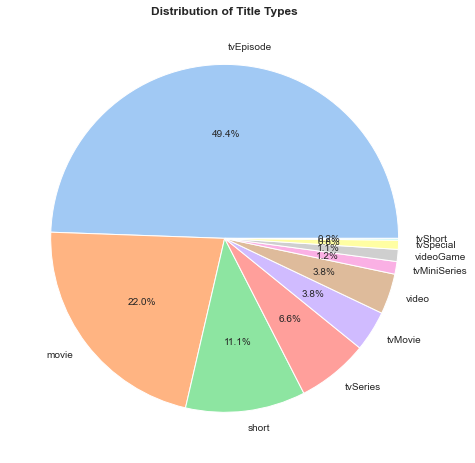

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(
    titleType_count.values, 
    labels = titleType_count.index, 
    colors = sns.color_palette('pastel'), 
    autopct='%.1f%%'
)
ax.set_title('Distribution of Title Types', weight = 'bold')
plt.show()

Looking at the distribution of title types we observe that tv episodes make up the majority of the title types at 49.4% and is followed second by movies at 22%. As our focus is only on movies, we will subset our dataset to only include movie entries.

# Let's Look at Movies

In [12]:
movies = titles.loc[titles['titleType'] == 'movie']
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45,Romance,5.3,207
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897.0,NaN,100,"Documentary,News,Sport",5.3,483
333,tt0000502,movie,Bohemios,Bohemios,0.0,1905.0,NaN,100,NaN,4.1,15
365,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,NaN,70,"Action,Adventure,Biography",6.0,854
373,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0.0,1907.0,NaN,90,Drama,5.0,21


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298663 entries, 8 to 1360549
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          298663 non-null  object 
 1   titleType       298663 non-null  object 
 2   primaryTitle    298663 non-null  object 
 3   originalTitle   298663 non-null  object 
 4   isAdult         298663 non-null  float64
 5   startYear       298625 non-null  float64
 6   endYear         0 non-null       float64
 7   runtimeMinutes  269170 non-null  object 
 8   genres          288478 non-null  object 
 9   averageRating   298663 non-null  float64
 10  numVotes        298663 non-null  int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 27.3+ MB


In [14]:
movies.isnull().sum()

tconst                 0
titleType              0
primaryTitle           0
originalTitle          0
isAdult                0
startYear             38
endYear           298663
runtimeMinutes     29493
genres             10185
averageRating          0
numVotes               0
dtype: int64

In [15]:
# change runtimeMinutes variable to float
movies['runtimeMinutes'] = movies['runtimeMinutes'].replace('NaN', np.nan).astype(float)

In [16]:
movies.sort_values('runtimeMinutes', ascending = False).head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
1298923,tt8273150,movie,Logistics,Logistics,0.0,2012.0,NaN,51420.0,Documentary,6.5,219
1056890,tt3854496,movie,Ambiancé,Ambiancé,0.0,2020.0,NaN,43200.0,Documentary,3.4,116
953889,tt2659636,movie,Modern Times Forever,Modern Times Forever,0.0,2011.0,NaN,14400.0,Documentary,6.2,96
498893,tt10844900,movie,Qw,Qw,0.0,2019.0,NaN,10062.0,Drama,7.3,35
915826,tt2355497,movie,Beijing 2003,Beijing 2003,0.0,2004.0,NaN,9000.0,Documentary,7.8,30
804288,tt18291334,movie,Ekalavya,Ekalavya,0.0,2022.0,NaN,5538.0,"Drama,Thriller",9.5,23
171253,tt0284020,movie,The Cure for Insomnia,The Cure for Insomnia,0.0,1987.0,NaN,5220.0,"Documentary,Music",4.9,404
198013,tt0342707,movie,The Longest Most Meaningless Movie in the World,The Longest Most Meaningless Movie in the World,0.0,1970.0,NaN,2880.0,"Documentary,Drama,History",6.0,195
505786,tt10958742,movie,Five-Year Diary,Five-Year Diary,0.0,1982.0,NaN,2160.0,Documentary,8.1,20
120464,tt0179184,movie,****,****,0.0,1967.0,NaN,1500.0,Drama,6.3,100


In [18]:
movies.loc[movies['startYear'].isnull()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
132979,tt0203086,movie,Home-Coming in Granddaughter: The Cultural Com...,San Jie Cao,0.0,NaN,NaN,58.0,Documentary,7.4,6
140738,tt0219466,movie,90° South,90° South,0.0,NaN,NaN,72.0,Documentary,7.3,196
230741,tt0417131,movie,Shubh Kaamna,Shubh Kaamna,0.0,NaN,NaN,138.0,"Comedy,Drama",6.5,23
461511,tt10172414,movie,You Don't Know Nicotine,You Don't Know Nicotine,0.0,NaN,NaN,NaN,Documentary,8.6,45
470060,tt10323216,movie,Goriber shongshar,Goriber shongshar,0.0,NaN,NaN,NaN,"Drama,Family,Romance",7.1,7
475802,tt10425364,movie,Samhain,Samhain,0.0,NaN,NaN,78.0,"Comedy,Horror",3.2,17
515205,tt11125820,movie,"The Great 14th: Tenzin Gyatso, the 14th Dalai ...","The Great 14th: Tenzin Gyatso, the 14th Dalai ...",0.0,NaN,NaN,82.0,Documentary,9.2,159
577684,tt12325302,movie,Luccas Neto em: Acampamento de Férias,Luccas Neto em: Acampamento de Férias,0.0,NaN,NaN,87.0,"Comedy,Family",2.8,86
577687,tt12325326,movie,Luccas Neto em: Acampamento de Férias 2,Luccas Neto em: Acampamento de Férias 2,0.0,NaN,NaN,81.0,"Comedy,Family",3.0,82
615068,tt13106696,movie,Quel che conta è il pensiero,Quel che conta è il pensiero,0.0,NaN,NaN,88.0,"Comedy,Drama",7.0,7


In [19]:
# create number of movies per year dataframe
movie_yrs = pd.DataFrame(movies['startYear'].value_counts()).reset_index()
movie_yrs = movie_yrs.rename(columns = {'index':'year', 'startYear':'number of movies'})
movie_yrs.sort_values('number of movies', ascending = False).head()

,year,number of movies
0,2019.0,10415
1,2018.0,10309
2,2017.0,10262
3,2022.0,9791
4,2016.0,9781


In [20]:
# create number of votes dataframe 
movie_votes = pd.DataFrame(movies.groupby('startYear')['numVotes'].sum()).reset_index()
movie_votes = movie_votes.rename(columns = {'startYear':'year', 'numVotes':'number of votes'})
movie_votes.sort_values('number of votes', ascending = False).head()

,year,number of votes
117,2014.0,44677171
116,2013.0,44453573
115,2012.0,40125833
114,2011.0,40005099
119,2016.0,37827033


Text(0.5, 1.0, 'Votes Per Year')

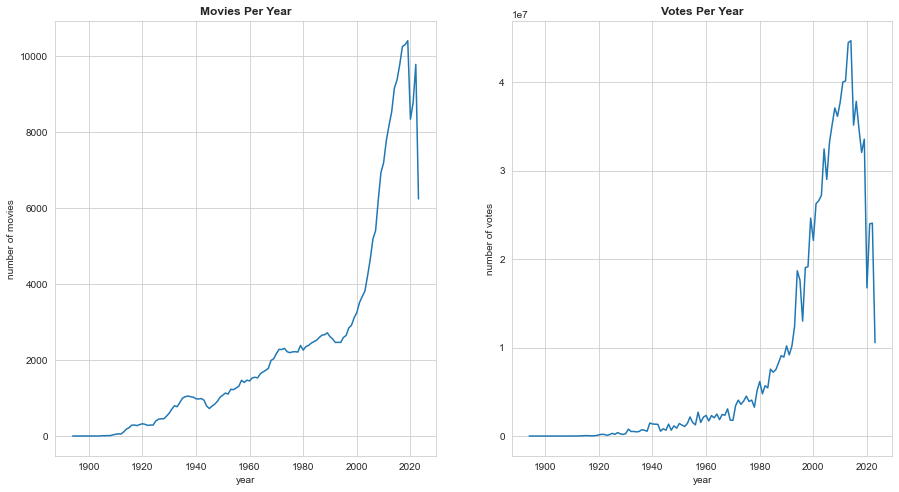

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
sns.set_style("whitegrid")

sns.lineplot(
    data = movie_yrs,
    x = 'year',
    y = 'number of movies',
    ax = ax1
)
ax1.set_title('Movies Per Year', weight = 'bold')

sns.lineplot(
    data = movie_votes,
    x = 'year',
    y = 'number of votes',
    ax = ax2
)
ax2.set_title('Votes Per Year', weight = 'bold')

From the two line graphs we can see that the number of movies and the number of votes have grown exponentially over time. As there are more movies in circulation, there are thus more votes casted. In the number of movies line graph you can see slight dips amidst the upward trend happening in around 1945 which corresponds to World War II as well as 2020 which would be the year of the Covid-19 pandemic. Interestingly, another current event that has effected movie production is the SAG-AFTRA strike, and from the data you can see that has greatly the number of movies and thereby the number of votes in 2023. Although the year is not over, the SAG-AFTRA strike may be the event that causes the greatest decline in movies annually we have witnessed since the late 1800s.

<AxesSubplot:xlabel='runtimeMinutes', ylabel='Count'>

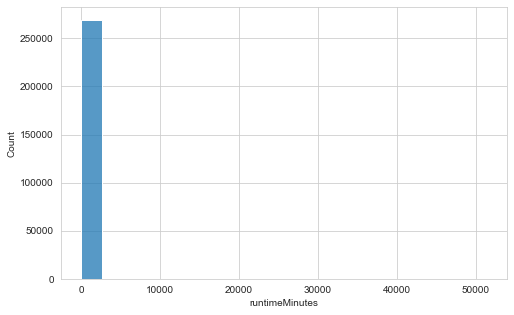

In [34]:
# runtimes of movies distribution
fig, ax = plt.subplots(figsize = (8,5))
sns.histplot(
    data = movies,
    x = 'runtimeMinutes',
    bins = 20
)

In [23]:
movies.dropna(subset = ['runtimeMinutes']).sort_values('runtimeMinutes', ascending = False).head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
1298923,tt8273150,movie,Logistics,Logistics,0.0,2012.0,NaN,51420.0,Documentary,6.5,219
1056890,tt3854496,movie,Ambiancé,Ambiancé,0.0,2020.0,NaN,43200.0,Documentary,3.4,116
953889,tt2659636,movie,Modern Times Forever,Modern Times Forever,0.0,2011.0,NaN,14400.0,Documentary,6.2,96
498893,tt10844900,movie,Qw,Qw,0.0,2019.0,NaN,10062.0,Drama,7.3,35
915826,tt2355497,movie,Beijing 2003,Beijing 2003,0.0,2004.0,NaN,9000.0,Documentary,7.8,30
804288,tt18291334,movie,Ekalavya,Ekalavya,0.0,2022.0,NaN,5538.0,"Drama,Thriller",9.5,23
171253,tt0284020,movie,The Cure for Insomnia,The Cure for Insomnia,0.0,1987.0,NaN,5220.0,"Documentary,Music",4.9,404
198013,tt0342707,movie,The Longest Most Meaningless Movie in the World,The Longest Most Meaningless Movie in the World,0.0,1970.0,NaN,2880.0,"Documentary,Drama,History",6.0,195
505786,tt10958742,movie,Five-Year Diary,Five-Year Diary,0.0,1982.0,NaN,2160.0,Documentary,8.1,20
120464,tt0179184,movie,****,****,0.0,1967.0,NaN,1500.0,Drama,6.3,100


From the histogram of the runtime minutes you can see that there is an outlier that right skews the distribution. The majority of the entries lie in the hundreds of minutes zone. Thus to properly analyze the distribution of the runtime minutes we need to get rid of the outliers. In examining the outliers, we can see that a movie has a runtime of 51420 minutes which is 857 hours. This data skews the data significantly so to get a better representation of the distribution of the runtime minutes, we need to remove the outliers. 

In [25]:
movies_rt = movies.loc[movies['runtimeMinutes'] < 300]

<AxesSubplot:xlabel='runtimeMinutes', ylabel='Count'>

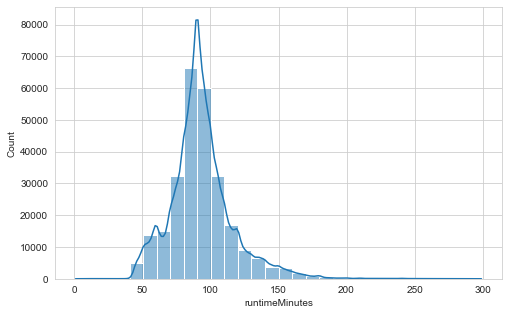

In [26]:
fig, ax = plt.subplots(figsize = (8,5))
sns.histplot(
    data = movies_rt,
    x = 'runtimeMinutes',
    bins = 30,
    kde = True
)

After removing the outliers in the runtime minutes, the distribution of the runtimes looks slightly right skewed. We can see that the majority of the movies fall in the rintime of about 100 minutes which is 1.5 hours, the amount of time that you would typically expect a movie to be. 

# Adult Rated Movies

Adult rated movies are those with ratings above R rated. These would be movies that hold X ratings or Not Rated ratings. In the data set many of the adult rated movies also have the Adult genre tag, as we see later as we examine genres that there are 4373 movies that are categorized in the adult rated genre which is approximately the number of movies that are adult rated. 

In [27]:
movies['isAdult'].value_counts()

0.0    294028
1.0      4635
Name: isAdult, dtype: int64

There is a large disparity between observations that are non adult rated vs adult rated movies. In our further analysis we will take into account these disparities and draw conclusions accordingly, relative to their respective groupings. 

<AxesSubplot:title={'center':'Average Ratings of Adult vs Non Adult Rated Movies'}, xlabel='isAdult', ylabel='averageRating'>

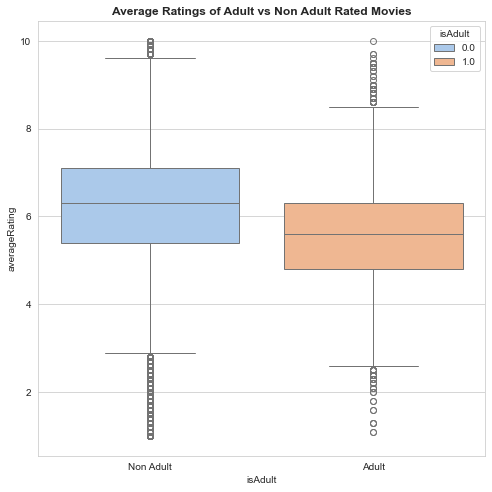

In [31]:
# look at adult vs not adult film ratings
fig, ax = plt.subplots(figsize = (8,8))
ax.set_xticklabels(['Non Adult', 'Adult'])
ax.set_title('Average Ratings of Adult vs Non Adult Rated Movies', weight = 'bold')
sns.boxplot(
    data = movies,
    x = 'isAdult',
    y = 'averageRating',
    hue = 'isAdult',
    palette = 'pastel'
)

The boxplot indicates that overall, adult rated movies tend to have a lower average rating than non adult rated movies. The upper whisker of the non adult boxplot is also higher at around a 9.5 average rating indicating that average ratings that are higher are more common for non adult movies than adult movies.

In [36]:
movie_A = movies.groupby(['isAdult', 'startYear']).mean('averageRating')
movie_A.head()

endYear  runtimeMinutes  averageRating  numVotes
isAdult startYear                                                  
0.0     1894.0         NaN            45.0           5.30     207.0
        1897.0         NaN           100.0           4.90     272.0
        1899.0         NaN           135.0           3.65      51.5
        1900.0         NaN            59.5           5.70      29.5
        1901.0         NaN             NaN           5.65      28.5

<AxesSubplot:xlabel='startYear', ylabel='averageRating'>

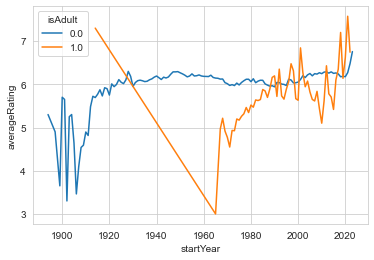

In [37]:
sns.set_style("whitegrid")
sns.lineplot(
    data = movie_A,
    x = 'startYear',
    y = 'averageRating',
    hue = 'isAdult'
)

In [38]:
movies.groupby(['isAdult', 'startYear']).size().sort_values(ascending = True).head(10)

isAdult  startYear
0.0      1894.0       1
         1902.0       1
         1904.0       1
1.0      1965.0       1
         1914.0       1
0.0      1897.0       2
         1899.0       2
         1900.0       2
         1901.0       2
         1903.0       2
dtype: int64

In [39]:
movies.loc[(movies['isAdult'] == 1) & (movies['startYear'].between(1914, 1965, inclusive = False))]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes


Upon further inspecting the decline of the adult movie ratings between 1914 and 1960 the reason for the linear decline was due to the fact that there were no adult rated movies in the dataset between 1914 and 1965. Additionally, in 1914 and 1965 both years each respectively only had one adult movie each, which makes the average rating misleading considering it only takes into consideration one movie. The high fluctuation in average ratings between the late 1800s and early 1900s for non adult rated movies are also explained by the lack of data present during the time period as many of those years were listed to contain 2 or fewer movies above. 

# Top 25 Most and Least Popular Mainstream Movies 

To look at popular and unpopular mainstream movies, we must define what it means to be 'popular' and 'mainstream' in our context. A popular movie will thus need to have both high ratings and high voting numbers. Mainstream movies would then need to have a high number of votes to indicate that it is not obscure. 

<AxesSubplot:xlabel='numVotes', ylabel='Count'>

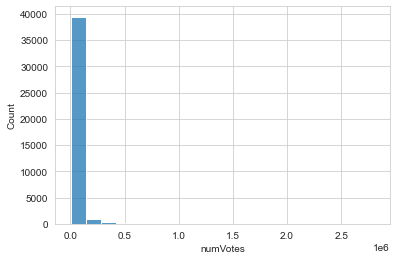

In [41]:
sns.histplot(
    data = movies.loc[movies['numVotes'] > 1000],
    x = 'numVotes',
    bins = 20
)

In [42]:
print(movies['numVotes'].quantile([0.25, 0.5, 0.75, 1]), '\nmean :', movies['numVotes'].mean())

0.25         19.0
0.50         61.0
0.75        313.0
1.00    2809451.0
Name: numVotes, dtype: float64 
mean : 3618.4946745998


Looking at the histogram and the we see that the majority of movies have less than 250,000 votes but there is an outlier that has 2,809,451 votes. Let's take a look at how many movies have over 50,000 votes.

<AxesSubplot:xlabel='numVotes', ylabel='Count'>

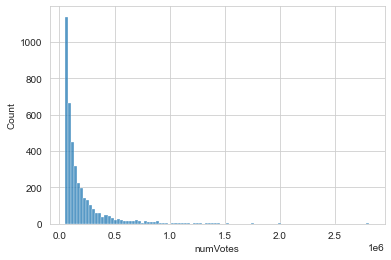

In [43]:
sns.histplot(
    data = movies.loc[movies['numVotes'] > 50000],
    x = 'numVotes',
    bins = 100
)

When we limit the number of movies with greater than 50,000 votes, we can see the distribution more clearly and also see that there are still a relatively large amount of movies to work with. Thus if we filter out obscure movies by only taking into consideration those with 50,000 or more votes, then we can create a list of mainstream movies. Popularity of a mainstream movie will then be the average ranking of movies with 50,000 or more votes. Let's create tables of the 25 most and least popular mainstream movies now!

In [44]:
movies.loc[movies['numVotes'] > 50000, ['primaryTitle', 'averageRating']].sort_values('averageRating', ascending = False).head(20)

,primaryTitle,averageRating
82585,The Shawshank Redemption,9.3
46253,The Godfather,9.2
48805,The Godfather Part II,9.0
114605,The Lord of the Rings: The Return of the King,9.0
251639,The Dark Knight,9.0
30046,12 Angry Men,9.0
79993,Schindler's List,9.0
82368,Pulp Fiction,8.9
38923,"The Good, the Bad and the Ugly",8.8
81489,Forrest Gump,8.8


In [45]:
movies.loc[movies['numVotes'] > 50000, ['primaryTitle', 'averageRating']].sort_values('averageRating', ascending = True).head(25)

,primaryTitle,averageRating
1185775,Reis,1.0
1282341,Sadak 2,1.2
774603,Justin Bieber: Never Say Never,1.7
568682,Disaster Movie,1.9
501091,Radhe,1.9
1272239,Enes Batur: Imagination or Reality?,2.0
206099,Son of the Mask,2.2
392658,Epic Movie,2.4
506932,Dragonball Evolution,2.5
123906,Battlefield Earth,2.5


# Movie Genres

In [46]:
genre_count = movies['genres'].value_counts()
genre_count

Drama                       50526
Documentary                 31151
Comedy                      24551
Comedy,Drama                 9612
Drama,Romance                9204
                            ...  
Action,Biography,Fantasy        1
Biography,Drama,News            1
Action,Adult,Western            1
Family,Sci-Fi,Thriller          1
Animation,Music,Sci-Fi          1
Name: genres, Length: 1270, dtype: int64

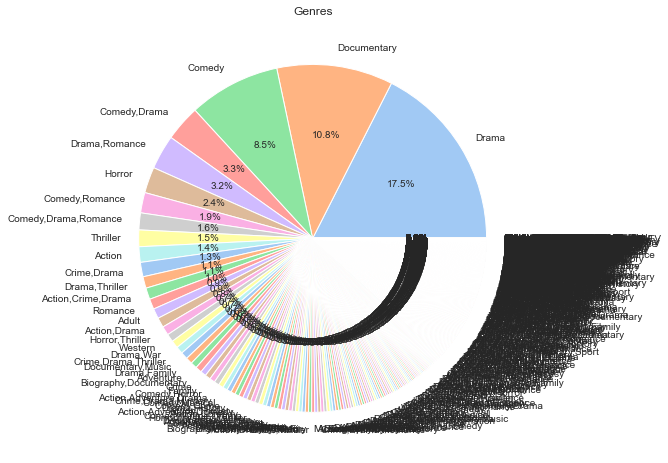

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(
    genre_count.values, 
    labels = genre_count.index, 
    colors = sns.color_palette('pastel'), 
    autopct='%.1f%%'
)
ax.set_title('Genres')
plt.show()

The pie chart looks overwhelming and unreadable because there seems to be a lot of genres. If you look at the dataset you can see that many entries have multiple genres listed such as 'Action, Crime, Drama'. This makes each of those movies listed with those three categories seem like they are in its own genre. In order to remedy this hyper-specificity of the genres of the movies we need to find the unique genres listed in the dataset. 

In [48]:
# copy the dataset as we will be altering it
# drop all entries with no genre listed
movie_genres = movies.copy()
movie_genres = movie_genres.dropna(subset = ['genres'])
print('Genre Null Values: ', movie_genres['genres'].isnull().sum())

Genre Null Values:  0


In [49]:
movie_genres['genres'] = movie_genres['genres'].str.split(',')
movie_genres.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45.0,[Romance],5.3,207
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897.0,NaN,100.0,"[Documentary, News, Sport]",5.3,483
365,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,NaN,70.0,"[Action, Adventure, Biography]",6.0,854
373,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0.0,1907.0,NaN,90.0,[Drama],5.0,21
387,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0.0,1907.0,NaN,NaN,[Drama],4.3,25


In [50]:
movie_genres = movie_genres.explode('genres')
movie_genres.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45.0,Romance,5.3,207
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897.0,NaN,100.0,Documentary,5.3,483
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897.0,NaN,100.0,News,5.3,483
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897.0,NaN,100.0,Sport,5.3,483
365,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,NaN,70.0,Action,6.0,854


Each movie is now listed under all of the genres that it is classified under so it will count towards each of its respective genres rather than the intersection of genres it was previously classified under.

In [51]:
unique_genres = movie_genres['genres'].value_counts()
unique_genres

Drama          133883
Comedy          73246
Documentary     46406
Romance         33339
Action          30934
Crime           25949
Thriller        25006
Horror          21939
Adventure       18558
Mystery         11709
Family          11538
Biography        9286
Fantasy          8988
History          8336
Music            7420
Sci-Fi           7037
Musical          6508
War              6191
Animation        5125
Western          5121
Adult            4373
Sport            3705
Film-Noir         881
News              667
Reality-TV         61
Talk-Show          15
Name: genres, dtype: int64

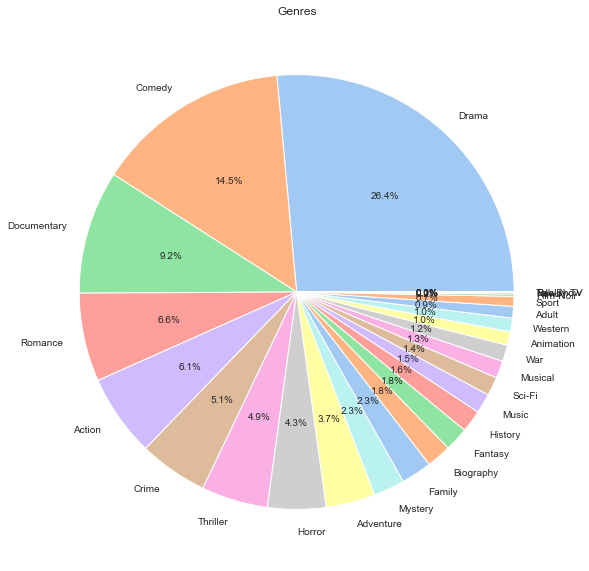

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.pie(
    unique_genres.values, 
    labels = unique_genres.index, 
    colors = sns.color_palette('pastel'), 
    autopct='%.1f%%'
)
ax.set_title('Genres')
plt.show()

Our pie chart of genres is now much more readable. Now we have 26 unique genre categories compared to the 1,270 we previously had. 

In [53]:
# average rating by genre
genre_ratings = movie_genres[['genres', 'averageRating']].groupby('genres').mean('averageRating').sort_values('averageRating', ascending = False)
genre_ratings

,averageRating
genres,
Documentary,7.231638
News,7.214843
Biography,6.960984
History,6.808853
Talk-Show,6.786667
Music,6.749420
Sport,6.633225
Reality-TV,6.567213
Film-Noir,6.463110


When you look at the genres with the highest average ratings, two of the genres (News and Talkshow) are in the bottom in terms of number of movies in those categories. This makes their averages decieving as there is just not a lot of data in these two categories. Given this we are going to focus on the most popular genres, in this case 'popular' will refer to genres with the most movies in them, and will not be based on their average ratings. These genres are those most demanded by audiences as they have the most movies within their respective genres.

## Top 5 Most Popular Genres

In [54]:
top_5 = movie_genres.loc[movie_genres['genres'].isin(unique_genres.index[0:5])]
top_5.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45.0,Romance,5.3,207
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897.0,NaN,100.0,Documentary,5.3,483
365,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,NaN,70.0,Action,6.0,854
373,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0.0,1907.0,NaN,90.0,Drama,5.0,21
387,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0.0,1907.0,NaN,NaN,Drama,4.3,25


In [55]:
top_5_grouped = top_5[['genres', 'startYear', 'averageRating']].groupby(['genres', 'startYear']).mean('averageRating')
top_5_grouped

averageRating
genres  startYear               
Action  1906.0          6.000000
        1910.0          5.600000
        1911.0          4.100000
        1912.0          5.700000
        1913.0          5.825000
...                          ...
Romance 2019.0          6.036419
        2020.0          6.039280
        2021.0          6.066667
        2022.0          6.270500
        2023.0          6.722136

[589 rows x 1 columns]

<AxesSubplot:title={'center':'Average Rating of the 5 Most Popular Genres Over Time'}, xlabel='startYear', ylabel='averageRating'>

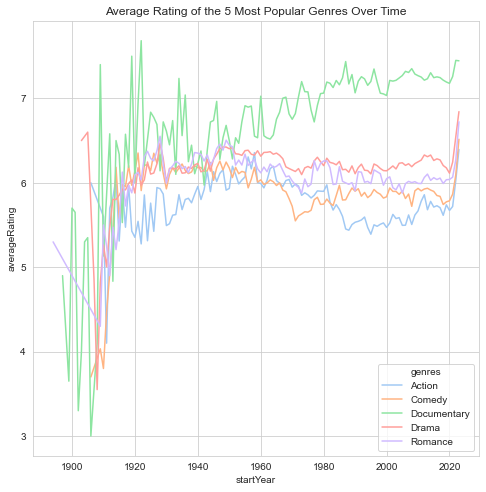

In [56]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title('Average Rating of the 5 Most Popular Genres Over Time')
sns.lineplot(
    data = top_5_grouped,
    x = 'startYear',
    y = 'averageRating',
    hue = 'genres',
    palette = 'pastel'
)

From our line graph we can see that movies in the documentary genre tend to have higher ratings almost consistently over time.  As of today the average ratings of the top 5 genres are ranked as follows from highest to lowest: action, drama, romance, comedy, and action. The trends show that people's ratings of specific genres have not changed drastically over time as each genres ratings hover around their respective average ratings when the line graphs of the genres begin to plateau after the 1920s with the exception of documentaries showing an upward trend in average ratings over time. The upward trend in average rating of documentaries may be due to the quality of documentaries improving with technology as well as people's higher appreciation for them in today's culture.

## Top 5 Most Poorly Rated Genres

Looking at the 5 most poorly rated genres, I noticed that the 'Adult' category was on the list, however I already did an analysis of this category previously, so to avoid redundancy we will look at the next lowest genre which will be Westerns.

In [59]:
bottom_5 = movie_genres.loc[movie_genres['genres'].isin(genre_ratings.iloc[[20,21,22,24,25], 0].index)] 
bottom_5.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
365,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,NaN,70.0,Action,6.0,854
950,tt0001993,movie,L'électrocuté,L'électrocuté,0.0,1911.0,NaN,NaN,Sci-Fi,4.1,22
1138,tt0002574,movie,What Happened to Mary,What Happened to Mary,0.0,1912.0,NaN,150.0,Action,6.1,33
1138,tt0002574,movie,What Happened to Mary,What Happened to Mary,0.0,1912.0,NaN,150.0,Thriller,6.1,33
1142,tt0002588,movie,Zigomar contre Nick Carter,Zigomar contre Nick Carter,0.0,1912.0,NaN,48.0,Thriller,6.0,48


In [60]:
bottom_5_grouped = bottom_5[['genres', 'startYear', 'averageRating']].groupby(['genres', 'startYear']).mean('averageRating')
bottom_5_grouped 

averageRating
genres  startYear               
Action  1906.0          6.000000
        1910.0          5.600000
        1911.0          4.100000
        1912.0          5.700000
        1913.0          5.825000
...                          ...
Western 2019.0          5.486047
        2020.0          5.175000
        2021.0          5.226531
        2022.0          5.748649
        2023.0          5.884375

[561 rows x 1 columns]

<AxesSubplot:title={'center':'Average Rating of The 5 Most Poorly Rated Genres Over Time'}, xlabel='startYear', ylabel='averageRating'>

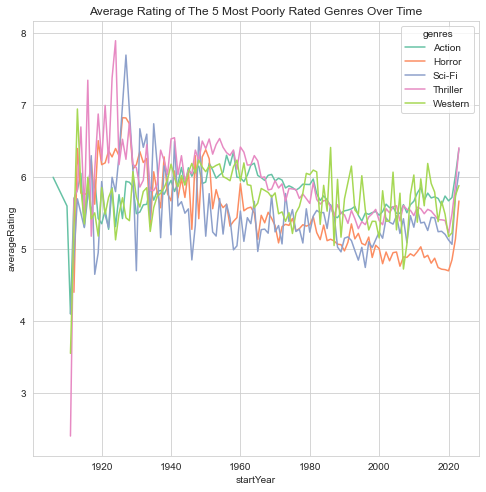

In [61]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title('Average Rating of The 5 Most Poorly Rated Genres Over Time')
sns.lineplot(
    data = bottom_5_grouped,
    x = 'startYear',
    y = 'averageRating',
    hue = 'genres',
    palette = 'Set2'
)

In the line graph we see that the average ratings begin to level out around the 1940s. However, interestingly, western movies saw a bigger fluctuations beginning in the 1980s wherease all other genres seem to have decreased fluctuations. This is likely due to a general decline in popularity of the western in modern day Hollywood, thus a lower quality of production of the western due to lower demand and interest. Another interesting trend observed was that post the covid-19 pandemic, the thriller and sci-fi saw the highest spike in average ratings. 